In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
data=pd.read_csv("/content/anime.csv")


In [20]:
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [21]:
data.shape

(12294, 7)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


### check for null values

In [23]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [24]:
data.dropna(inplace=True)

In [25]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [26]:

data.duplicated().sum()

np.int64(0)

In [27]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


<class 'pandas.core.series.Series'>
Index: 12017 entries, 0 to 12293
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
12017 non-null  float64
dtypes: float64(1)
memory usage: 187.8 KB


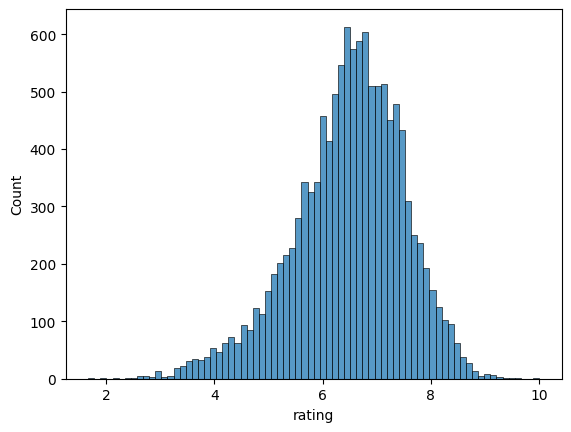

In [28]:
data['rating'].info()
sns.histplot(data['rating'])
data['rating'].skew()
plt.show()

In [29]:
data['genre']
exploded_series = data['genre'].explode()
unique_elements = exploded_series.unique()
print(unique_elements)


['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Action, Comedy, Hentai, Romance, Supernatural' 'Hentai, Sports'
 'Hentai, Slice of Life']


In [32]:
anime_data = pd.read_csv("/content/anime.csv")
anime_data['genre'] = anime_data['genre'].fillna('')
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [33]:
genres = set(genre for sublist in anime_data['genre'] for genre in sublist)
for genre in genres:
    anime_data[genre] = anime_data['genre'].apply(lambda x: 1 if genre in x else 0)
anime_data.drop(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], axis=1, inplace=True)

item_similarity = cosine_similarity(anime_data)

item_similarity_df = pd.DataFrame(item_similarity, index=anime_data.index, columns=anime_data.index)

def get_similar_anime(anime_id, top_n=5):
    similar_anime = item_similarity_df.loc[anime_id].sort_values(ascending=False)[1:top_n+1]
    return similar_anime
similar_anime = get_similar_anime(anime_id=60, top_n=5)
print(similar_anime)

4418    0.973329
3089    0.973329
3544    0.973329
6394    0.971825
5805    0.971825
Name: 60, dtype: float64


# 1. Difference Between User-Based and Item-Based Collaborative Filtering
**User-Based Collaborative Filtering:**

- Finds users with similar preferences and recommends items liked by similar users.

-  Example: If two users have similar watch history on a streaming platform, one user's favorite movie might be recommended to the other.

-  Computationally expensive in large datasets due to dynamic user interactions.

**Item-Based Collaborative Filtering:**

-  Finds items that are similar based on user interactions and recommends them.

-  Example: If two books are frequently bought together, one might be recommended when the other is purchased.

-  More stable than user-based filtering since item relationships don’t change as frequently.

# 2. What is Collaborative Filtering and How Does It Work?
- Collaborative Filtering is a recommendation technique that suggests items based on user interactions and behaviors.
- It works by analyzing patterns of preferences (ratings, purchases, views) to predict what a user might like.

- **Two main approaches:**

-   Memory-Based: Uses similarity measures (cosine similarity, Pearson correlation) between users or items.

 * Model-Based: Uses machine learning (e.g., matrix factorization, deep learning) to predict missing ratings.

 * Common applications include Netflix, Amazon, and Spotify recommendations.